<a href="https://colab.research.google.com/github/saleh1312/Joker-Mask-using-opencv-python/blob/main/joker_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os 
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the detector
detector = dlib.get_frontal_face_detector()
# Load the predictor


# put your path to the 68 landmarks file here 
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

In [ ]:
def paint(img,p,color):
  a3 = p.astype(np.int32)
  im = np.zeros([img.shape[0],img.shape[1]],dtype=np.uint8)
  cv2.fillPoly( im, a3, 255 )

  for x in range(img.shape[1]):
    for y in range(img.shape[0]):
      if im[y,x]==255:
        img[y,x]=np.array(color,dtype=np.uint8)


In [ ]:
def belnd(src,photo,p,alpha):
  for x in range(src.shape[1]):
    for y in range(src.shape[0]):
      dst=cv2.pointPolygonTest(p,(x,y),False)
      if dst>-1:
        b=src[y,x,0]*alpha + photo[y,x,0]*(1-alpha)
        g=src[y,x,1]*alpha + photo[y,x,1]*(1-alpha)
        r=src[y,x,2]*alpha + photo[y,x,2]*(1-alpha)
        photo[y,x]=np.array([b,g,r],dtype=np.uint8)

In [ ]:
def map2(p):
  p1=np.array([[255,714],[31,472],[482,474]]).astype(np.float32)
  p2=np.array([p[8],p[1],p[15]]).astype(np.float32)
  target=np.array([[155,327],[364,327],[460,350],[56,342]]).T.astype(np.float32)
  m1=np.array([[1.0,1.0,1.0,1.0]]).astype(np.float32)
  target = np.vstack((target, m1)).astype(np.float32)
  m=cv2.getAffineTransform(p1,p2)
  target=m.dot(target).astype(np.int32)
  return target.T

In [ ]:
def tarkeep(img,item,p1,p2):
  m=cv2.getPerspectiveTransform(p2,p1)
  res=cv2.warpPerspective(item, m, ( img.shape[1], img.shape[0]),borderMode=cv2.BORDER_CONSTANT,borderValue=(0,255,0) )

  for x in range(img.shape[1]):
    for y in range(img.shape[0]):
      if  not (res[y,x,0]<=10 and res[y,x,1]>=250 and res[y,x,2]<=10):
        img[y,x]=res[y,x]

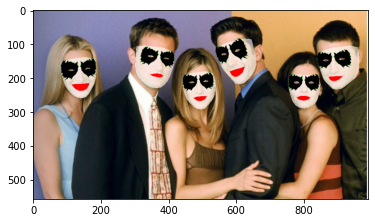

In [ ]:
img = cv2.imread('fre.jpg')
copy=img.copy()
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
faces = detector(gray)
p=[]
for face in faces:
  x1 = face.left() # left point
  y1 = face.top() # top point
  x2 = face.right() # right point
  y2 = face.bottom() # bottom point
  landmarks = predictor(image=gray, box=face)
  
  for n in range(0, 68):
    x = (landmarks.part(n).x)
    y = (landmarks.part(n).y)
    p.append((x,y))
  for n in range(4):
    x = 0
    y = 0
    p.append((x,y))

p=np.float32(p)

for i in range(0,p.shape[0],72):
  main_points= p[i:i+68]
  additional_points= map2(main_points)
  p[i+68:i+72]=additional_points

j_e=cv2.imread('mask-eyes.jpg')

for i in range(0,p.shape[0],72):
  facep=p[i:i+72]
  hull=cv2.convexHull(facep,False)
  hullee=np.reshape(hull,(hull.shape[1],hull.shape[0],hull.shape[2]))
  paint(copy,hullee,[255,255,255])
  belnd(img,copy,hullee,0.4)

  right_eye=np.array([facep[6],facep[10],facep[45],facep[36]]).astype(np.float32)
  
  p2=np.array([[381,1036],[684,1027],[718,586],[326,591]]).astype(np.float32)
  tarkeep(copy,j_e,right_eye,p2)

  ble=np.array([facep[42],facep[43],facep[44],facep[45],facep[46],facep[47]])
  belnd(img,copy,ble,1)
  ble=np.array([facep[36],facep[37],facep[38],facep[39],facep[40],facep[41]])
  belnd(img,copy,ble,1)


  mouth=[]

  mouth.append(facep[48])
  mouth.append(facep[49])
  mouth.append(facep[50])
  mouth.append(facep[52])
  mouth.append(facep[53])
  mouth.append(facep[54])
  mouth.append(facep[55])
  mouth.append(facep[56])
  mouth.append(facep[57])
  mouth.append(facep[58])
  mouth.append(facep[59])

  mouth=np.array([mouth]).astype(np.int32)
  paint(copy,mouth,[0,0,255])

  ble=np.array([p[60],p[61],p[62],p[63],p[64],p[65],p[66],p[67]])
  belnd(img,copy,ble,1)



op= cv2.cvtColor(copy,cv2.COLOR_BGR2RGB)
plt.imshow(op/255.0)

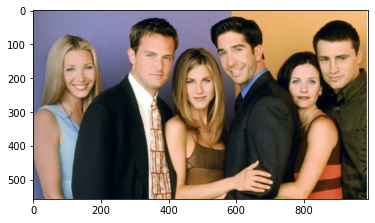

In [ ]:
op= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(op/255.0)